<a href="https://colab.research.google.com/github/MatteoGandetto/Corso_ML_con_Python/blob/master/Classificazione_k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [0]:
# package for scientific computing
import numpy as np

#collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 

#data analysis and manipulation tool
import pandas as pd 

#Python API for Google Sheets
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

# LOAD DATASET

feature:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 classes:  ['setosa' 'versicolor' 'virginica'] 

dimensione features vector (150, 4)
dimensione labels vector (150,)


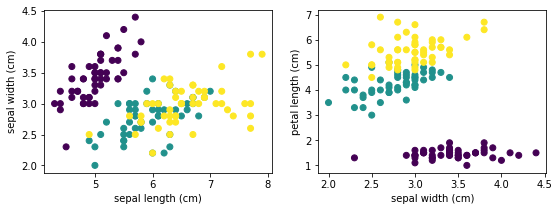

In [2]:
from sklearn import datasets

import matplotlib.pyplot as plt

#load iris dataset
# 3 classes, 4 features,50 samples per features
iris = datasets.load_iris()
#print(iris)

print ('feature: ',iris.feature_names,'\n classes: ',iris.target_names,'\n')
#print(iris.DESCR,'\n')

data = iris.data
labels = iris.target

print('dimensione features vector',data.shape)
print('dimensione labels vector',labels.shape)

fig,ax=plt.subplots(1,2)
fig.set_size_inches(9,3)
for axis,i in zip(ax,range(0,2)):
  axis.scatter(data[:,i],data[:,i+1],c=labels)
  axis.set_xlabel(iris.feature_names[i])
  axis.set_ylabel(iris.feature_names[i+1])

plt.show()




# DATA PREPARATION

In [4]:
#splitting the data into training and test sets 
from sklearn.model_selection import train_test_split

#Optional parameter ‘test-size’ determines the split percentage. 
#‘random_state’ parameter makes the data split the same way every time you run.
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.2
                                                 ,random_state=4)

#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

# shape of new y objects
print(y_train.shape)
print(y_test.shape)


(120, 4)
(30, 4)
(120,)
(30,)


# K-NN CLASSIFICATION - I USE

In [5]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics

# Instantiating the CLASSIFIER
knn = KNeighborsClassifier(n_neighbors = 5)

# fit the model with data, TRAINING 
knn.fit(X_train, y_train)

# Predict the response for observations being passed, here 'X-test'
y_pred_test = knn.predict(X_test)

# getting the testing accuracy of KNN (K=5)
print ('ACCURACY:',metrics.accuracy_score(y_test, y_pred_test))
print ('CONFUSION MATRIX\n',metrics.confusion_matrix(y_test, y_pred_test))


ACCURACY: 0.9666666666666667
CONFUSION MATRIX
 [[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


# K-NN CLASSIFICATION - II USE

Text(0, 0.5, 'Testing Accuracy')

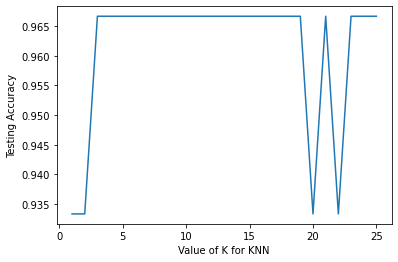

In [6]:
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred_test=knn.predict(X_test)
        scores_list.append(metrics.accuracy_score(y_test,y_pred_test))


#plot the accuracy with different value of k
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


# K-NN CLASSIFICATION - III USE

In [8]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Determines the cross-validation splitting strategy. Possible inputs for cv are:
#-None, to use the default 5-fold cross validation,
k_range = range(1,26)
cv_results = []
mean_cv_results = []
cv=5
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        
        #add to the list cv_result the accuracy given by cross_val_score
        #compute by using kFold for training
        cv_results.append(model_selection.cross_val_score(knn, 
                                                          data, 
                                                          labels,
                                                          cv=cv,
                                                          scoring='accuracy'))
        #print (cv_results[k-1])
        mean_cv_results.append(cv_results[k-1].mean())
        
print (f'lowest k with max accuracy is {mean_cv_results.index(max(mean_cv_results))+1}')
print (f'for k={mean_cv_results.index(max(mean_cv_results))+1} the mean accuracy of {cv}-fold is {max(mean_cv_results)}')



###########################
# create a k-nn with previous pars and fit it with 
#use kNN with the best k but fit with hold-method
knn = KNeighborsClassifier(n_neighbors=mean_cv_results.index(max(mean_cv_results))+1)
#print ('size data',data.shape)
#print ('size data',labels.shape)

#concatenate data and label
data_and_labels=np.append(data,labels[:,None], axis=1)
#print (data_and_labels.shape)

#randomize
np.random.shuffle(data_and_labels)

#hold 4/5 DS as train
train = data_and_labels[0:4*int(len(data_and_labels)/5)]

#hold 1/5 DS as test 
test=data_and_labels[(4*int(len(data_and_labels)/5)):]

#train the model with training  vector
train_features=train[:,0:4]
train_lables=train[:,4]
knn.fit(train_features, train_lables)

#test
test_features=test[:,0:4]
test_lables=test[:,4]
test_labels_predict= knn.predict(test[:,0:4])
#compute metrics and show them
print("\naccuracy",accuracy_score(test_lables,test_labels_predict))
print("confusion_matrix\n",confusion_matrix(test_lables,test_labels_predict))


lowest k with max accuracy is 6
for k=6 the mean accuracy of 5-fold is 0.9800000000000001

accuracy 0.9666666666666667
confusion_matrix
 [[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
